

#  Investigate a Dataset (No show Appointment)
##### Done by: Makarem Al-Salman

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

	
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li> the last column: says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
 </ul> 
 
 ## Posted Questions
<ol> 
<li>Do the female patient care more about their appointments?</li>
<li>Does having a Diabetes affect on the patient commitment  of their appointments?</li>
<li>Which age range is more commitment  of their appointments?</li>
</ol>
 

In [48]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [49]:
# Loading data and Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df_appointments=pd.read_csv('No_show_appointment.csv')
df_appointments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [50]:
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [51]:
# Create a list of unique values in handcap column
list(df_appointments['Handcap'].unique())

[0, 1, 2, 3, 4]

In [52]:
# this returns a tuple of the dimensions of the dataframe
df_appointments.shape

(110527, 14)

In [53]:
# although the datatype for AppointmentDay, ScheduledDay appears to be object, further
# investigation shows it's a string
print('appointment Day data type:',type(df_appointments['AppointmentDay'][0]))
print('Scheduled Day data type:',type(df_appointments['ScheduledDay'][0]))


appointment Day data type: <class 'str'>
Scheduled Day data type: <class 'str'>


In [54]:
sum(df_appointments.duplicated())

0

In [55]:
# this returns useful descriptive statistics for each column of data
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

After assessing and exploring the data I found that the dataset has no missing data & no duplicate data!! WOW.
But it has the following problems:
<ul>
<li>icorrect data type for ‘AppointmentDay’ , ‘ScheduledDay’ ,and ‘PatientId’ columns.</li>
<li>outlier values in ‘Age’ column like (-1, 115).</li>
<li>Misspelled  names in  ‘Hipertension’ , ‘No-show’ , and ‘Handcap’ columns. </li>
</ul>   

##### 1. Columns Remaing:
I will start with renaming  ‘Hipertension’ , ‘No-show’ , and ‘Handcap’ columns.

In [56]:
#renaming  ‘Hipertension’ , and ‘Handcap’ columns
df_appointments.rename(columns={'Hipertension':'Hypertension','Handcap':'handicap','No-show':'No_show'}, inplace=True)
#check the result
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### 2.changing datatypes:
second, i will change the datatype for:
<li>‘AppointmentDay’ from string to date & time </li>
<li>‘ScheduledDay’ from string to date & time</li>
<li>‘PatientId’ from float to string</li>


In [57]:
#changing datatype of ‘PatientId’ column by using numpy functions
df_appointments['PatientId']= (df_appointments['PatientId']).astype(str)
#changing datatype by using pandas function 
df_appointments['AppointmentDay']=pd.to_datetime(df_appointments['AppointmentDay'])
df_appointments['ScheduledDay']=pd.to_datetime(df_appointments['ScheduledDay'])
#check the result
df_appointments.info()
df_appointments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 3.Removing outlier data:
finally I will remove the unrealistic data in  ‘Age’ column in the following steps:
<ol>
    <li>detacte the outliler values.</li>
    <li>define the boundries.</li>
    <li>replace the outliers value with the mean of patients ages.</li>
    
<ol>


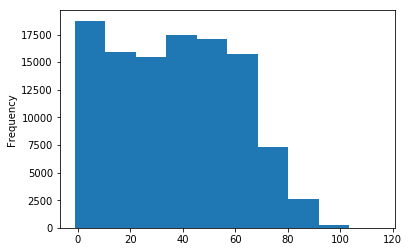

In [58]:
#detacting the outliler values
# plot Age to draw histogram
df_appointments['Age'].plot(kind='hist');

the concentration of the values is very high in range of 0 years to 90 years. therefore, i will consider the values less than 0 and above 90 as outliers. 

In [59]:
#define the boundries
Lower_bound = 0.0
Upper_bound = 0.997
result = df_appointments['Age'].quantile([Lower_bound,Upper_bound])
result

0.000    -1.0
0.997    90.0
Name: Age, dtype: float64

any value is more than -1 is acceptable value and any value is more than 90 is an outlier value

#### case 1 :
-1.0 < -1 < 90.0 - False

#### case 2 :
-1.0 < 20 < 90.0 - True


In [60]:
#definin the values accepted range
true_value =(result.loc[Lower_bound] < df_appointments['Age'].values) & (df_appointments['Age'].values < result.loc[Upper_bound])
#check the result
true_value

array([ True,  True,  True, ...,  True,  True,  True])

In [61]:
#use this line to check the result
#df_appointments.Age[true_value]

In [62]:
#obtaining the outlier values by reversing the true values
false_value = ~true_value
false_value

array([False, False, False, ..., False, False, False])

In [63]:
#calculating the mean of the patients ages
mean_value = np.mean(df_appointments.Age[true_value])
mean_value = int(mean_value)
mean_value

36

In [64]:
#replace the ouliers values with the mean value
df_appointments.Age[false_value].fillna(mean_value,inplace=True)
#check the result
df_appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274.0,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661.0,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123.0,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972.0,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297.0,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [65]:
#use this line to check the result
#df_appointments.Age[false_value]

In [66]:
# use this line to check the result
#df_appointments['Age']

<a id='eda'></a>
## Exploratory Data Analysis
Now I have done with cleaning my data It is clean and clear. I will move on to exploration and compute statistics to answer the question.

### Research Question 1: Do the female patient care more about their appointments?

In this question I will find whather the female patients are more committed to their appointments


In [67]:
#findinging the number of female and male patients
df_appointments['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [68]:
#calculting the number of female patients who came to their appointment
df_F_show = df_appointments.loc[(df_appointments['Gender'] == "F") & (df_appointments['No_show']== "No")]
F_show = df_F_show['PatientId'].count()
F_show

57246

In [69]:
#calculting the number of female patients who skip to their appointment
df_F_Noshow = df_appointments.loc[(df_appointments['Gender'] == "F") & (df_appointments['No_show']== "Yes")]
F_Noshow = df_F_Noshow['PatientId'].count()
F_Noshow

14594

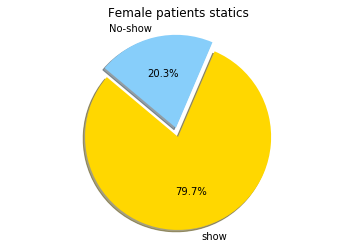

In [70]:
#draw a pie chart to illustrate the result

#import matplotlib 
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'show', 'No-show'
sizes = [F_show, F_Noshow]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female patients statics')  
plt.axis('equal')
plt.show()

this graph show us that Almost 80% of female patients tend to attend thier appointments 

In [71]:
#calculting the number of male patients who came to their appointment
df_M_show = df_appointments.loc[(df_appointments['Gender'] == "M") & (df_appointments['No_show']== "No")]
M_show = df_M_show['PatientId'].count()
M_show

30962

In [72]:
#calculting the number of male patients who skip their appointment
df_M_Noshow = df_appointments.loc[(df_appointments['Gender'] == "M") & (df_appointments['No_show']== "Yes")]
M_Noshow = df_M_Noshow['PatientId'].count()
M_Noshow

7725

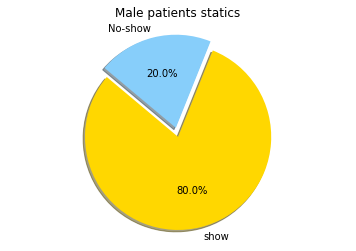

In [73]:
#draw a pie chart to illustrate the result
# Data to plot
labels = 'show', 'No-show'
sizes = [M_show, M_Noshow]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Male patients statics') 
plt.axis('equal')
plt.show()

this graph show us that 80% of male patients tend to attend thier appointments

### therefore,
gender does not have an effect on patients commitment toward their appointments

### Research Question 2: Does having a Diabetes affect on the patient commitment of their appointments?
In this question I will find wether or not diabetics tend to skip thier appoientments

In [74]:
#findinging the number of diabetics 
df_appointments['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [75]:
#calculting the number of diabetics who came to their appointment
df_D_show = df_appointments.loc[(df_appointments['Diabetes'] == 1) & (df_appointments['No_show']== "No")]
D_show_count = df_D_show['PatientId'].count()
D_show_count

6513

In [76]:
#calculting the number of diabetics who skip their appointment
df_D_Noshow = df_appointments.loc[(df_appointments['Diabetes'] == 1) & (df_appointments['No_show']== "Yes")]
D_Noshow_count = df_D_Noshow['PatientId'].count()
D_Noshow_count

1430

In [77]:
#total diabetics
D_total =  7943
#calculting the percentage for both diabetics who attend their appointment and who's not
show_count_Percentage = int((D_show_count/D_total)*100)
print('Percentage of diabetics who comes to their appointment: ',show_count_Percentage ,'%' )
Noshow_count_Percentage = int((D_Noshow_count/D_total)*100)
print('Percentage of diabetics who skip their appointment:'  ,Noshow_count_Percentage ,'%' )

Percentage of diabetics who comes to their appointment:  81 %
Percentage of diabetics who skip their appointment: 18 %


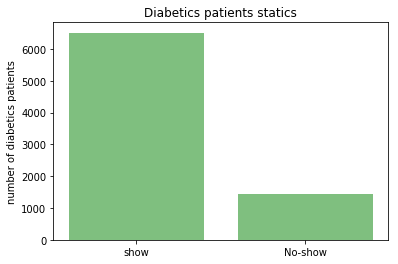

In [78]:
#draw a Bar chart to illustrate the result
objects = ('show', 'No-show')
y_pos = np.arange(len(objects))
values = [D_show_count,D_Noshow_count]

plt.bar( y_pos, values, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)

plt.ylabel('number of diabetics patients')
plt.title('Diabetics patients statics')

plt.show()

### As result : 
 Diabetes does not have an effect on patients commitment toward their appointments

### Research Question 3: Which age range is more commitment of their appointments?
In this Question I will find out which age range (children , youth, older people) tend to attend thier appointments.

In [79]:
#calculating the number of kids who came to their appointment
df_kids_show = df_appointments.loc[(df_appointments['Age']> -1) & (df_appointments['Age']< 16) & (df_appointments['No_show']== "No")]
kids_show_count = df_kids_show['PatientId'].count()
kids_show_count

19220

In [80]:
#calculating the number of kids who skip their appointment
df_kids_Noshow = df_appointments.loc[(df_appointments['Age']> -1) & (df_appointments['Age']< 16) & (df_appointments['No_show']== "Yes")]
kids_Noshow_count = df_kids_Noshow['PatientId'].count()
kids_Noshow_count

5248

In [81]:
#calculating the number of youth who came to their appointment
df_youth_show = df_appointments.loc[(df_appointments['Age']> 15) & (df_appointments['Age']< 41) & (df_appointments['No_show']== "No")]
youth_show_count = df_youth_show['PatientId'].count()
youth_show_count

27741

In [82]:
#calculating the number of youth who came to their appointment
df_youth_Noshow = df_appointments.loc[(df_appointments['Age']> 15) & (df_appointments['Age']< 41) & (df_appointments['No_show']== "Yes")]
youth_Noshow_count = df_youth_Noshow['PatientId'].count()
youth_Noshow_count

8474

In [83]:
#calculating the number of old people who came to their appointment
df_old_show = df_appointments.loc[(df_appointments['Age']> 40) & (df_appointments['Age']< 100) & (df_appointments['No_show']== "No")]
old_show_count = df_old_show['PatientId'].count()
old_show_count

41238

In [84]:
#calculating the number of old people who came to their appointment
df_old_Noshow = df_appointments.loc[(df_appointments['Age']> 40) & (df_appointments['Age']< 100) & (df_appointments['No_show']== "yes")]
old_Noshow_count = df_old_Noshow['PatientId'].count()
old_Noshow_count

0

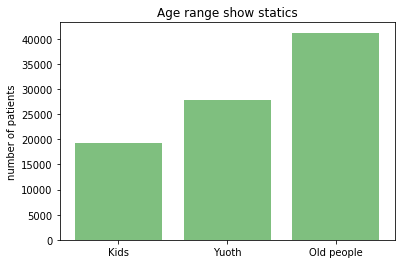

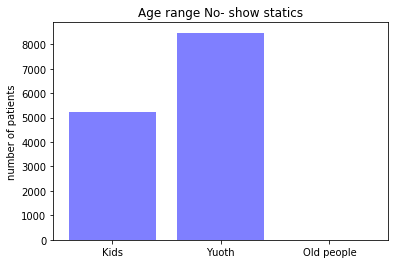

In [85]:
#draw a Bar chart to illustrate the result of show
objects = ('Kids', 'Yuoth','Old people')
y_pos = np.arange(len(objects))
values = [kids_show_count, youth_show_count, old_show_count]
 
plt.bar( y_pos, values, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)

plt.ylabel('number of patients')
plt.title('Age range show statics')

plt.show()

#draw a Bar chart to illustrate the result ob no show
objects = ('Kids', 'Yuoth','Old people')
y_pos = np.arange(len(objects))
values = [kids_Noshow_count, youth_Noshow_count, old_Noshow_count]
 
plt.bar( y_pos, values, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)

plt.ylabel('number of patients')
plt.title('Age range No- show statics')

plt.show()

### As result :
Even though the number of kids and youth patient who attend thier appointment is very high. But all older people came to thier appointments which means they have a higher commitment to their appointments

### finally:
the following correlation_matrix provide a breif prview of relationships  between patient variables.

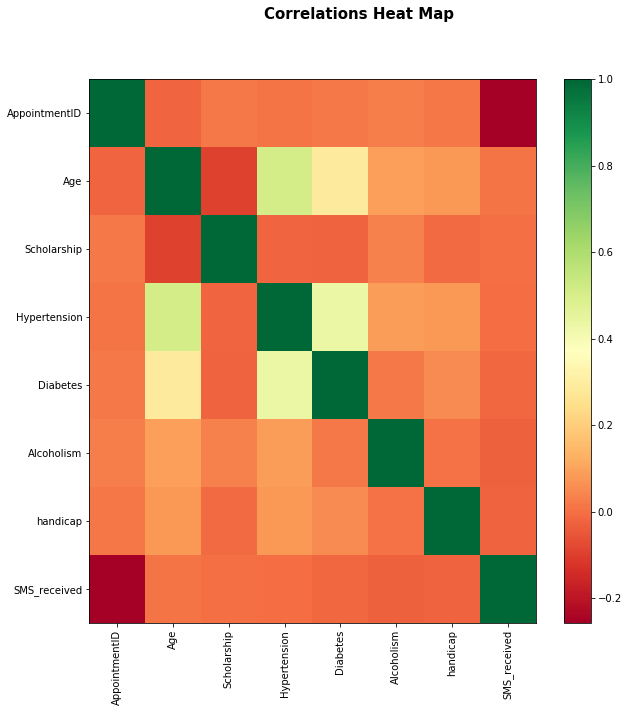

In [94]:
def correlation_matrix(df):
    #Compute Correlation
    corr = df.corr()

    #Plot Correlation Matrix using Matplotlib

    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns);
    plt.suptitle('Correlations Heat Map', fontsize=15, fontweight='bold')
    plt.show()

correlation_matrix(df_appointments)

<a id='conclusions'></a>
## Conclusions


the main focus of this report is looking at relationships between patient variables and his commitment towards his appointment.
I chose to investigate the relationship between (patient age, diabetes, patent gender) with the patient appointments attendance.
I have found that these variables do not affect the patient commitment to his appointments except the age. 
older people tend to have a higher commitment. I think this relationship is strong and direct since usually the older the human get, they suffer from more diseases

##### limitations:

<li>handicap have anonymous 4 unique values. thier meaning is not clear. therefore, I could not use them in investigation.</li>
<li>I need the appointment location neighbourhood along with the patient neighbourhood to find out if the desteance affact on the patient appointments attendance.</li>
